# Call Center Metric Analysis

### This report intends to analyze the incoming call hold times, abandoned call rates, and customer satisfaction ratings.  

#### This analysis can provide information that will assist with management decisions on staffing needs

In [22]:
import pandas as pd
import numpy as np
import random
import scipy
import sorted_months_weekdays
import sort_dataframeby_monthorweek
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [23]:
#first I will read the data into a datafile
df = pd.read_csv('SleuthGoose_Call_Data.csv')
df.head(2)

,Unnamed: 0,date,time,call_id,agent_id,answer_time_minute,answer_time_second,talk_time_minute,talk_time_second,escalation,abandoned_num,abandoned,csat,csat_value
0,1,1/9/2022,4:53 PM,2186,212,1,43,26,54,False,0,False,False,NaN
1,1,1/9/2022,2:09 PM,3563,211,2,43,51,4,False,0,False,True,0.0


In [24]:
#Calculate percentage of calls that have a wait time of five minutes or more
calls = df.call_id.count()
over_five = 0
over_five = len(df[df['answer_time_minute']>=5])

percent_over_five = (over_five/calls)*100
over_five

print("Total Calls: "+str(calls)+"    Calls With Over Five Minute Wait: "+str(over_five)+"   Percentage With Over Five Minute Wait: "+"{:.2f}".format(percent_over_five)+"%")

Total Calls: 4616    Calls With Over Five Minute Wait: 1077   Percentage With Over Five Minute Wait: 23.33%


In [25]:
#Explore data answer time and escalations
df['escalation_num'] = df['escalation'].map({True: 1, False: 0})


print('Escalations: ',df['escalation_num'].describe())
print()
print('Answer Times: ', df['answer_time_minute'].describe()) 
 


Escalations:  count    4616.000000
mean        0.099653
std         0.299570
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: escalation_num, dtype: float64

Answer Times:  count    4616.000000
mean        3.586438
std         1.899735
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: answer_time_minute, dtype: float64


In [26]:
#I will create a copy of the datafile to remove all calls with wait times under 5 minutes
#ref: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
#ref https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
df1 = df.copy()

#creating another column that hods a 0 if the call time is over 5 minutes and 1 if it is not
df1['over_five'] = np.where(df1['answer_time_minute'] < 5, 0, 1)

#create a day_name column from the date
#ref: https://www.statology.org/pandas-day-of-week/
df1['date'] = pd.to_datetime(df1['date'])
df1['day_name'] = df1['date'].dt.day_name()

#create a month column from the date column
df1['month'] = pd.DatetimeIndex(df1['date']).month_name()


#create a column that is 0 if there is an escalation or 1 if there is not an escalation
df1['escalation_num'] = np.where(df1['escalation'] ==False, 0, 1)

#create new copy of datafile
df2 = df1.copy()
df2.tail()

,Unnamed: 0,date,time,call_id,agent_id,answer_time_minute,answer_time_second,talk_time_minute,talk_time_second,escalation,abandoned_num,abandoned,csat,csat_value,escalation_num,over_five,day_name,month
4611,7,2022-09-24,1:18 PM,2966,216,6,59,0,27,False,0,False,False,NaN,0,1,Saturday,September
4612,7,2022-09-24,6:36 PM,4971,210,3,31,53,52,False,0,False,True,0.0,0,0,Saturday,September
4613,7,2022-09-24,2:46 PM,2967,213,8,41,14,5,False,0,False,False,NaN,0,1,Saturday,September
4614,7,2022-09-24,8:19 AM,2969,214,2,54,54,17,False,0,False,False,NaN,0,0,Saturday,September
4615,7,2022-09-24,5:12 PM,4970,214,2,14,19,53,False,0,False,True,0.0,0,0,Saturday,September


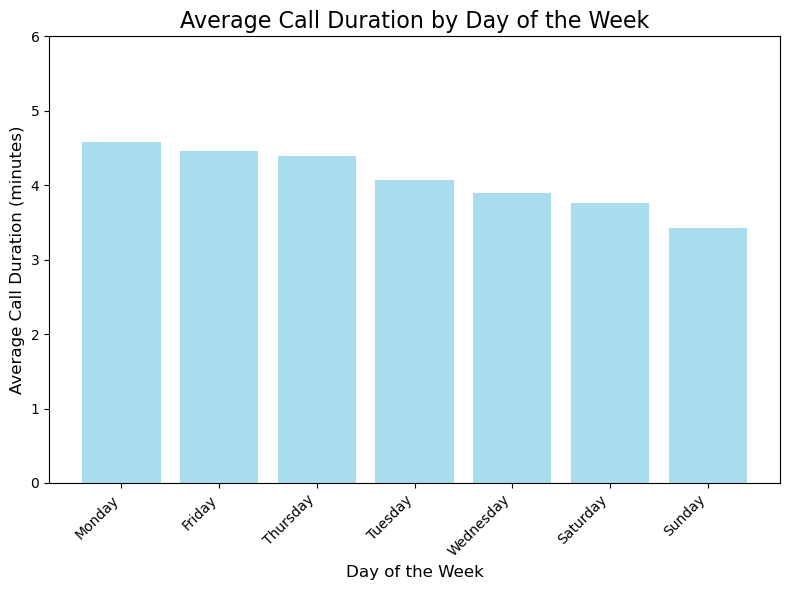

AVERAGE SPEED TO ANSWER IN MINUTES BY DAY
Monday: 4.582945736434109 minutes
Friday: 4.459156378600823 minutes
Thursday: 4.393874007936508 minutes
Tuesday: 4.068227593152065 minutes
Wednesday: 3.8897260273972605 minutes
Saturday: 3.7647073052733426 minutes
Sunday: 3.423613271124935 minutes


In [27]:
# Calculate the total call duration (in minutes) for each call and take the average by day of the week
df1['total_answer_time'] = (df1['answer_time_minute'] * 60 + df1['answer_time_second']) / 60
average_duration_by_day = df1.groupby('day_name')['total_answer_time'].mean()

# Order the days of the week based on the average call duration in descending order
ordered_days = average_duration_by_day.sort_values(ascending=False).index

# Plot the ordered days (optional)
plt.figure(figsize=(8, 6))
plt.bar(ordered_days, average_duration_by_day[ordered_days], color='skyblue', alpha=0.7)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Call Duration (minutes)', fontsize=12)
plt.title('Average Call Duration by Day of the Week', fontsize=16)
plt.ylim(0, 6)  # Set the y-axis limit to 6

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Print the ordered days with their corresponding total call duration
print('AVERAGE SPEED TO ANSWER IN MINUTES BY DAY')
for day in ordered_days:
    print(f"{day}: {average_duration_by_day[day]} minutes")

ANOVA p-value: 2.9872486233864654e-38


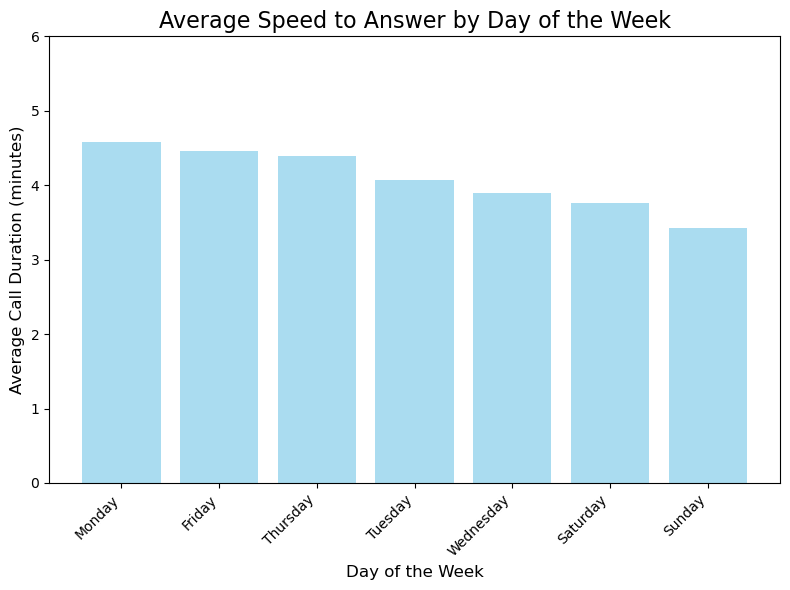

AVERAGE SPEED TO ANSWER IN MINUTES BY DAY
Monday: 4.582945736434109 minutes
Friday: 4.459156378600823 minutes
Thursday: 4.393874007936508 minutes
Tuesday: 4.068227593152065 minutes
Wednesday: 3.8897260273972605 minutes
Saturday: 3.7647073052733426 minutes
Sunday: 3.423613271124935 minutes


In [28]:

from scipy.stats import f_oneway

# Calculate the total call duration (in minutes) for each call and take the average by day of the week
df1['total_answer_time'] = (df1['answer_time_minute'] * 60 + df1['answer_time_second']) / 60
average_duration_by_day = df1.groupby('day_name')['total_answer_time'].mean()

# Order the days of the week based on the average call duration in descending order
ordered_days = average_duration_by_day.sort_values(ascending=False).index

# Perform ANOVA test
groups = []
for day in ordered_days:
    groups.append(df1[df1['day_name'] == day]['total_answer_time'])

anova_result = f_oneway(*groups)
print("ANOVA p-value:", anova_result.pvalue)

# Plot the ordered days
plt.figure(figsize=(8, 6))
plt.bar(ordered_days, average_duration_by_day[ordered_days], color='skyblue', alpha=0.7)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Call Duration (minutes)', fontsize=12)
plt.title('Average Speed to Answer by Day of the Week', fontsize=16)
plt.ylim(0, 6)  # Set the y-axis limit to 6
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Print the ordered days with their corresponding total call duration
print('AVERAGE SPEED TO ANSWER IN MINUTES BY DAY')
for day in ordered_days:
    print(f"{day}: {average_duration_by_day[day]} minutes")


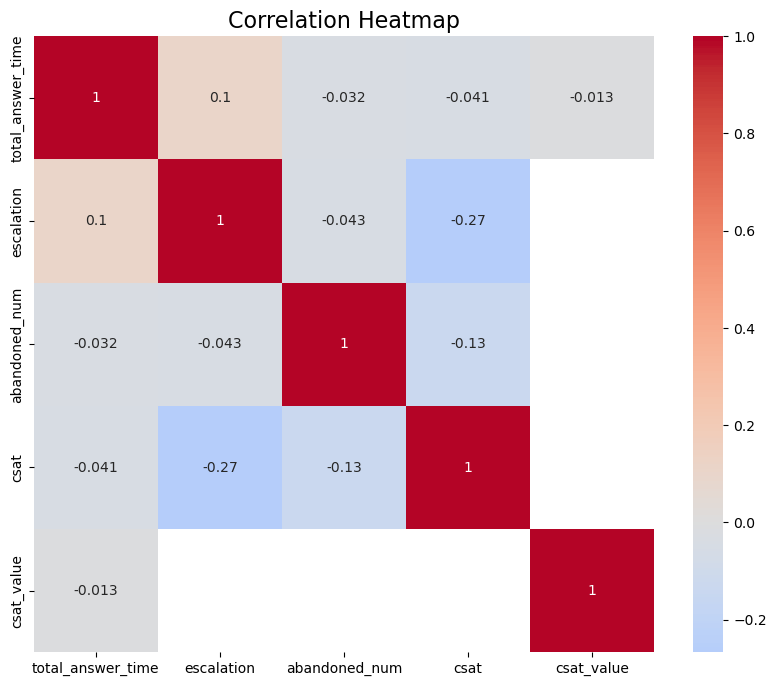

In [29]:
# Calculate the correlation between average call duration and other variables
correlation_matrix = df1[['total_answer_time', 'escalation', 'abandoned_num', 'csat', 'csat_value']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [30]:
#count the number of calls with over 5 min wait time for each day
#ref: https://stackoverflow.com/questions/47320572/pandas-groupby-and-count
#ref: https://stackoverflow.com/questions/29403192/convert-series-returned-by-pandas-series-value-counts-to-a-dictionary?newreg=1d163811775a4ddeb9fcb8bbfbc66c27
df2.value_counts(subset=['day_name'])
values = df2['day_name'].value_counts(dropna=False).keys().tolist()
counts = df2.value_counts(subset=['day_name']).tolist()
day_dict = dict(zip(values, counts))


df2.value_counts(subset=['month'])
values = df2['month'].value_counts(dropna=False).keys().tolist()
counts = df2.value_counts(subset=['month']).tolist()
month_dict = dict(zip(values, counts))
month_dict, day_dict


({'March': 619,
  'April': 610,
  'February': 557,
  'January': 537,
  'May': 503,
  'June': 488,
  'August': 475,
  'July': 449,
  'September': 378},
 {'Saturday': 689,
  'Thursday': 672,
  'Tuesday': 662,
  'Wednesday': 657,
  'Friday': 648,
  'Monday': 645,
  'Sunday': 643})

Total Escalations: 460   Percentage of Escalations: 9.97%
Percentage of Escalations for Calls Over Five Minutes: 14.95%
Percentage of Escalations for Calls Under Five Minutes: 8.45%


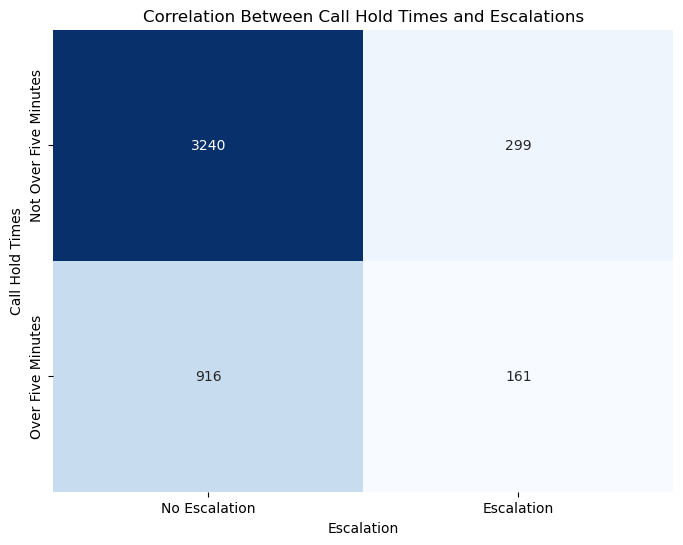

In [31]:
# Calculate the percentage of calls with escalations
escalations = df2['escalation_num'].sum()
percent_escalations = (escalations / calls) * 100

print("Total Escalations: " + str(escalations) + "   Percentage of Escalations: " + "{:.2f}".format(percent_escalations) + "%")

# Create a pivot table to analyze the relationship between over_five and escalations
pivot_table = df2.pivot_table(index='over_five', columns='escalation_num', values='call_id', aggfunc='count', fill_value=0)
pivot_table.rename(index={0: 'Not Over Five Minutes', 1: 'Over Five Minutes'}, columns={0: 'No Escalation', 1: 'Escalation'}, inplace=True)

# Calculate the percentage of escalations for calls over five minutes and calls under five minutes
percent_escalations_over_five = (pivot_table.loc['Over Five Minutes', 'Escalation'] / pivot_table.loc['Over Five Minutes'].sum()) * 100
percent_escalations_under_five = (pivot_table.loc['Not Over Five Minutes', 'Escalation'] / pivot_table.loc['Not Over Five Minutes'].sum()) * 100

print("Percentage of Escalations for Calls Over Five Minutes: " + "{:.2f}".format(percent_escalations_over_five) + "%")
print("Percentage of Escalations for Calls Under Five Minutes: " + "{:.2f}".format(percent_escalations_under_five) + "%")

# Visualize the correlation between over_five and escalations
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Correlation Between Call Hold Times and Escalations')
plt.xlabel('Escalation')
plt.ylabel('Call Hold Times')
plt.show()


From the results, it appears that there is a higher proportion of escalated calls among the ones that were on hold for over five minutes (161 out of 1,077 calls, which is approximately 15%). 

In comparison, there were fewer escalated calls among the ones not on hold for over five minutes (299 out of 3,539 calls, which is approximately 8.5%).

This suggests that there might be a correlation between longer hold times and escalations, as the percentage of escalated calls is higher when the hold time exceeds five minutes.


In [174]:

# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(df2['over_five'], df2['escalation_num'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
from scipy.stats import chi2_contingency

print("Chi-square value:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(pd.DataFrame(expected, index=['Not Over Five Minutes', 'Over Five Minutes'], columns=['No Escalation', 'Escalation']))


Chi-square value: 38.164111759703005
p-value: 6.503767274372569e-10
Degrees of freedom: 1
Expected frequencies table:
                       No Escalation  Escalation
Not Over Five Minutes     3186.32669   352.67331
Over Five Minutes          969.67331   107.32669


Interpretation:
The extremely low p-value (6.50e-10) suggests that there is a highly significant association between call hold times and escalations. Therefore, we can reject the null hypothesis of no association.

In practical terms, this means that the observed difference in the percentage of escalations between calls on hold over five minutes and calls not on hold over five minutes is unlikely to be due to random chance. Instead, it is indicative of a real relationship between the two variables: longer call hold times are correlated with a higher likelihood of escalations.

Based on these results, it would be reasonable to conclude that there is a statistically significant correlation between call hold times longer than five minutes and the occurrence of escalations in the call center data.


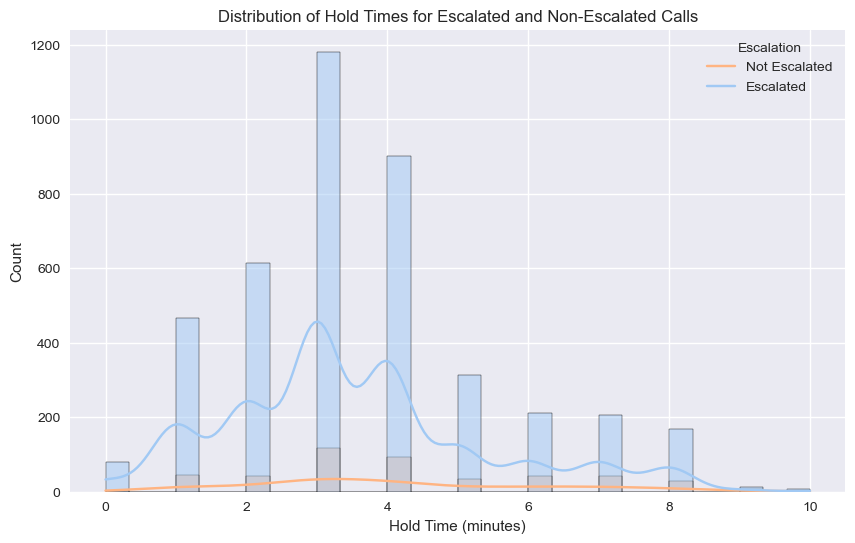

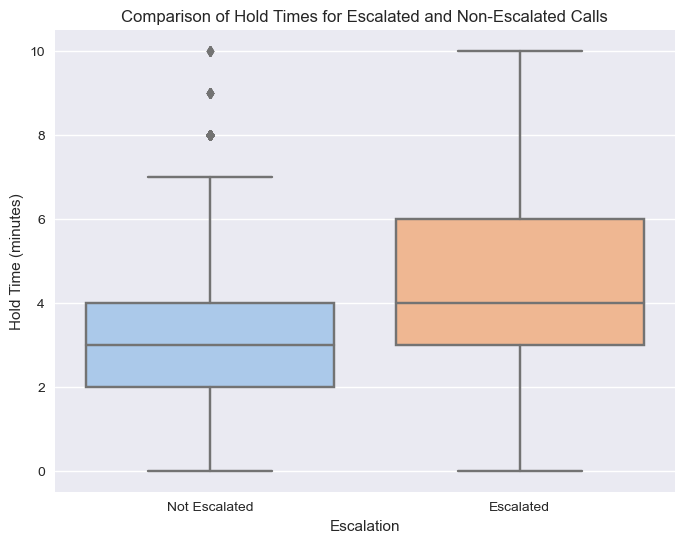

In [175]:
# Visualization 1: Histogram of Hold Times for Escalated and Non-Escalated Calls
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='answer_time_minute', hue='escalation_num', kde=True, bins=30, palette='pastel')
plt.title('Distribution of Hold Times for Escalated and Non-Escalated Calls')
plt.xlabel('Hold Time (minutes)')
plt.ylabel('Count')
plt.legend(title='Escalation', labels=['Not Escalated', 'Escalated'])
plt.show()

# Visualization 2: Box Plot of Hold Times for Escalated and Non-Escalated Calls
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='escalation_num', y='answer_time_minute', palette='pastel')
plt.title('Comparison of Hold Times for Escalated and Non-Escalated Calls')
plt.xlabel('Escalation')
plt.ylabel('Hold Time (minutes)')
plt.xticks([0, 1], ['Not Escalated', 'Escalated'])
plt.show()


In [176]:
# Convert the 'date' column to a datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Convert the 'time' column to a datetime format with a specific format
df2['time'] = pd.to_datetime(df2['time'], format='%I:%M %p').dt.time

# Combine 'date' and 'time' columns into a single timestamp column
df2['timestamp'] = pd.to_datetime(df2['date'].dt.strftime('%Y-%m-%d') + ' ' + df2['time'].astype(str))

# Drop the original 'date' and 'time' columns (optional)
#df2.drop(columns=['date', 'time'], inplace=True)

# Set the new timestamp column as the index
df2.set_index('timestamp', inplace=True)


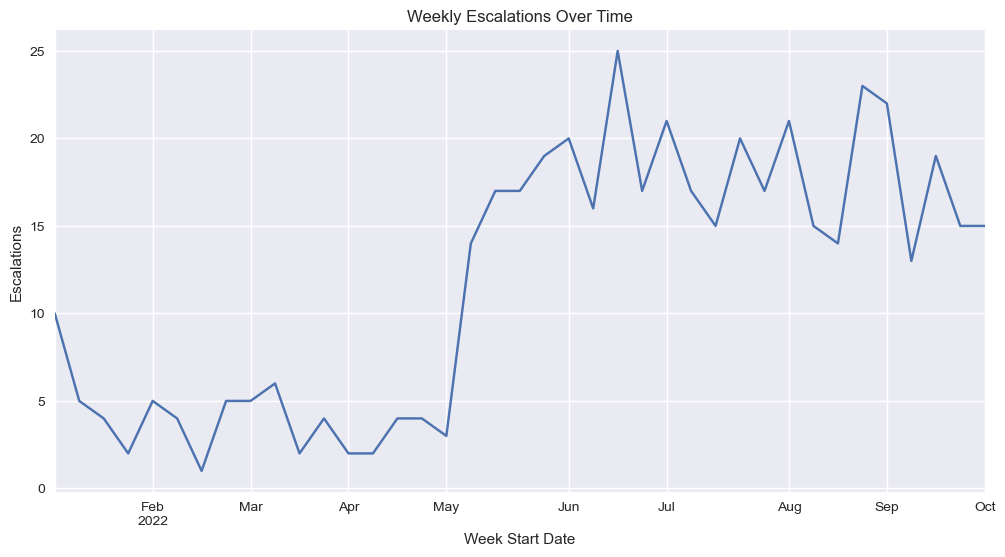

In [177]:
# Resample data for weekly escalations
escalations_weekly = df2['escalation_num'].resample('W').sum()

# Plot the time series for weekly escalations
plt.figure(figsize=(12, 6))
escalations_weekly.plot()
plt.title('Weekly Escalations Over Time')
plt.xlabel('Week Start Date')
plt.ylabel('Escalations')
plt.show()


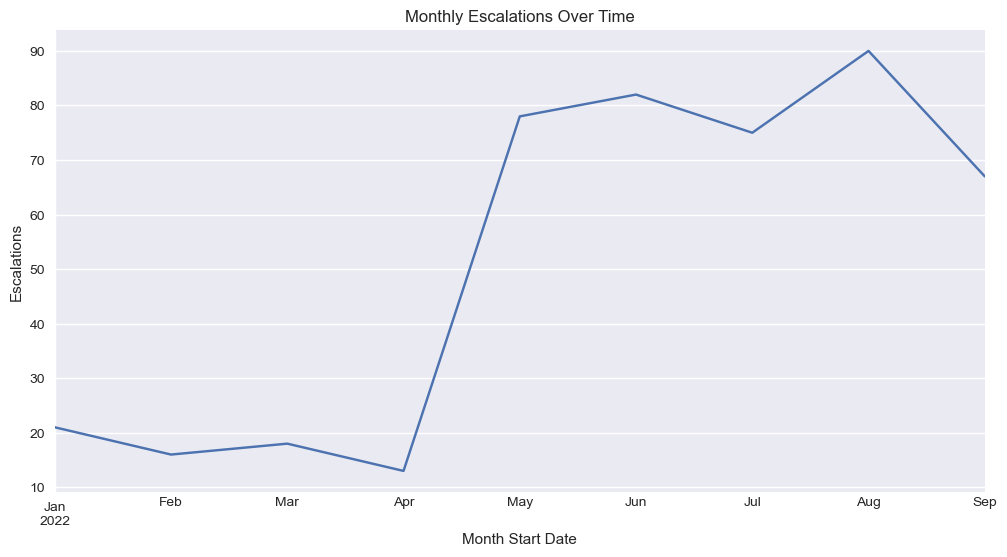

In [178]:
# Resample data for monthly escalations
escalations_monthly = df2['escalation_num'].resample('M').sum()

# Plot the time series for monthly escalations
plt.figure(figsize=(12, 6))
escalations_monthly.plot()
plt.title('Monthly Escalations Over Time')
plt.xlabel('Month Start Date')
plt.ylabel('Escalations')
plt.show()


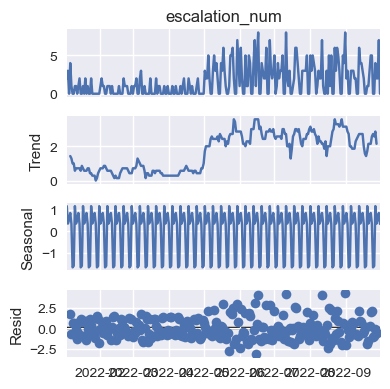

In [179]:
from statsmodels.tsa.seasonal import seasonal_decompose

escalations_daily = df2['escalation_num'].resample('D').sum()

result = seasonal_decompose(escalations_daily, model='additive')
result.plot()
plt.show()

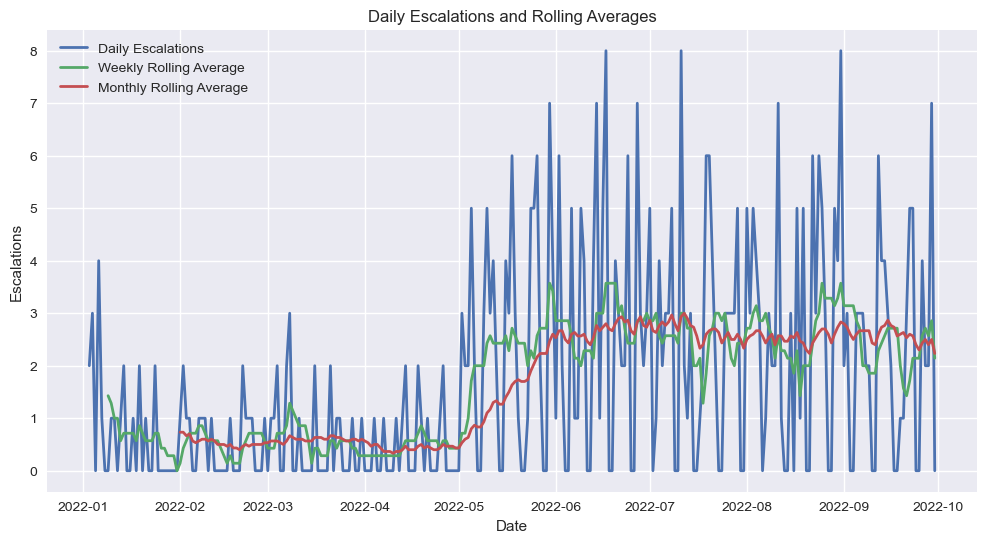

In [180]:
# Calculate the rolling average of daily escalations with a window of 7 days (weekly rolling average)
rolling_average_weekly = escalations_daily.rolling(window=7).mean()

# Calculate the rolling average of daily escalations with a window of 30 days (monthly rolling average)
rolling_average_monthly = escalations_daily.rolling(window=30).mean()

# Plot the original daily escalations along with the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(escalations_daily, label='Daily Escalations', linewidth=2)
plt.plot(rolling_average_weekly, label='Weekly Rolling Average', linewidth=2)
plt.plot(rolling_average_monthly, label='Monthly Rolling Average', linewidth=2)
plt.title('Daily Escalations and Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Escalations')
plt.legend()
plt.show()

In [186]:
df_cleaned = df2.copy()

In [187]:
# Data preparation

# Drop the 'Unnamed: 0' column as it is not needed
df_cleaned.drop(columns=['Unnamed: 0'], inplace=True)

# Encode binary categorical variables 'escalation' and 'abandoned'
df_cleaned['escalation'] = df_cleaned['escalation'].astype(int)
df_cleaned['abandoned'] = df_cleaned['abandoned'].astype(int)
df_cleaned['csat'] = df_cleaned['csat'].astype(int)

# Combine 'date' and 'time' columns into a single timestamp column
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['date'].dt.strftime('%Y-%m-%d') + ' ' + df_cleaned['time'].astype(str))

# Feature Engineering - calculate total talk time in seconds
df_cleaned['total_answer_time_seconds'] = df_cleaned['answer_time_minute'] * 60 + df_cleaned['answer_time_second']


In [188]:
df_cleaned

,date,time,call_id,agent_id,answer_time_minute,answer_time_second,talk_time_minute,talk_time_second,escalation,abandoned_num,abandoned,csat,csat_value,over_five,day_name,month,escalation_num,timestamp,total_answer_time_seconds
timestamp,,,,,,,,,,,,,,,,,,,
2022-01-09 16:53:00,2022-01-09,16:53:00,2186,212,1,43,26,54,0,0,0,0,NaN,0,Sunday,January,0,2022-01-09 16:53:00,103
2022-01-09 14:09:00,2022-01-09,14:09:00,3563,211,2,43,51,4,0,0,0,1,0.0,0,Sunday,January,0,2022-01-09 14:09:00,163
2022-01-09 07:11:00,2022-01-09,07:11:00,1049,210,3,45,37,7,0,0,0,0,NaN,0,Sunday,January,0,2022-01-09 07:11:00,225
2022-01-09 16:25:00,2022-01-09,16:25:00,1051,212,3,6,43,44,0,0,0,1,4.0,0,Sunday,January,0,2022-01-09 16:25:00,186
2022-01-09 13:52:00,2022-01-09,13:52:00,3059,216,3,37,33,50,0,0,0,1,0.0,0,Sunday,January,0,2022-01-09 13:52:00,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-24 13:18:00,2022-09-24,13:18:00,2966,216,6,59,0,27,0,0,0,0,NaN,1,Saturday,September,0,2022-09-24 13:18:00,419
2022-09-24 18:36:00,2022-09-24,18:36:00,4971,210,3,31,53,52,0,0,0,1,0.0,0,Saturday,September,0,2022-09-24 18:36:00,211
2022-09-24 14:46:00,2022-09-24,14:46:00,2967,213,8,41,14,5,0,0,0,0,NaN,1,Saturday,September,0,2022-09-24 14:46:00,521


In [189]:
from sklearn.linear_model import LinearRegression

# Assuming you have already resampled 'escalations_weekly'
X = np.arange(len(escalations_weekly)).reshape(-1, 1)  # Create an array for the time index
y = escalations_weekly.values  # Convert the pandas Series to a numpy array

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope of the trend line
trend_slope = model.coef_[0]

print("Slope of the Trend Line:", trend_slope)


Slope of the Trend Line: 0.5006072874493929


In [190]:
print(df_cleaned.columns)
df_cleaned.head()

Index(['date', 'time', 'call_id', 'agent_id', 'answer_time_minute',
       'answer_time_second', 'talk_time_minute', 'talk_time_second',
       'escalation', 'abandoned_num', 'abandoned', 'csat', 'csat_value',
       'over_five', 'day_name', 'month', 'escalation_num', 'timestamp',
       'total_answer_time_seconds'],
      dtype='object')


,date,time,call_id,agent_id,answer_time_minute,answer_time_second,talk_time_minute,talk_time_second,escalation,abandoned_num,abandoned,csat,csat_value,over_five,day_name,month,escalation_num,timestamp,total_answer_time_seconds
timestamp,,,,,,,,,,,,,,,,,,,
2022-01-09 16:53:00,2022-01-09,16:53:00,2186,212,1,43,26,54,0,0,0,0,NaN,0,Sunday,January,0,2022-01-09 16:53:00,103
2022-01-09 14:09:00,2022-01-09,14:09:00,3563,211,2,43,51,4,0,0,0,1,0.0,0,Sunday,January,0,2022-01-09 14:09:00,163
2022-01-09 07:11:00,2022-01-09,07:11:00,1049,210,3,45,37,7,0,0,0,0,NaN,0,Sunday,January,0,2022-01-09 07:11:00,225
2022-01-09 16:25:00,2022-01-09,16:25:00,1051,212,3,6,43,44,0,0,0,1,4.0,0,Sunday,January,0,2022-01-09 16:25:00,186
2022-01-09 13:52:00,2022-01-09,13:52:00,3059,216,3,37,33,50,0,0,0,1,0.0,0,Sunday,January,0,2022-01-09 13:52:00,217


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Step 1: Convert 'answer_time_minute' and 'answer_time_second' to a single 'answer_time_total_seconds' column
df_cleaned['answer_time_total_seconds'] = df_cleaned['answer_time_minute'] * 60 + df_cleaned['answer_time_second']

# Step 2: Create a new binary target variable 'answer_time_over_five'
df_cleaned['answer_time_over_five'] = (df_cleaned['answer_time_total_seconds'] > 300).astype(int)

# Step 3: Feature Engineering - Extract the hour of the day from the 'timestamp' column
df_cleaned['hour_of_day'] = df_cleaned['timestamp'].dt.hour

# Step 4: Split the data into training and testing sets
X = df_cleaned[['hour_of_day']]
y = df_cleaned['answer_time_over_five']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a logistic regression model to predict 'answer_time_over_five'
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model's performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7673160173160173
Confusion Matrix:
 [[709   0]
 [215   0]]


In [192]:
from imblearn.over_sampling import SMOTE

# Step 4: Perform SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Step 6: Evaluate the model's performance on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.4945887445887446
Confusion Matrix:
 [[355 354]
 [113 102]]


In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have already prepared your DataFrame 'df_cleaned'

# Step 1: Convert 'answer_time_minute' and 'answer_time_second' to a single 'answer_time_total_seconds' column
df_cleaned['answer_time_total_seconds'] = df_cleaned['answer_time_minute'] * 60 + df_cleaned['answer_time_second']

# Step 2: Create a new binary target variable 'answer_time_over_five'
df_cleaned['answer_time_over_five'] = (df_cleaned['answer_time_total_seconds'] > 300).astype(int)

# Step 3: Feature Engineering - Extract the hour of the day from the 'timestamp' column
df_cleaned['hour_of_day'] = df_cleaned['timestamp'].dt.hour

# Step 4: Split the data into training and testing sets
X = df_cleaned[['hour_of_day']]
y = df_cleaned['answer_time_over_five']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest model to predict 'answer_time_over_five'
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model's performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7673160173160173
Confusion Matrix:
 [[709   0]
 [215   0]]


In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming you have already prepared your DataFrame 'df_cleaned'

# Step 1: Convert 'answer_time_minute' and 'answer_time_second' to a single 'answer_time_total_seconds' column
df_cleaned['answer_time_total_seconds'] = df_cleaned['answer_time_minute'] * 60 + df_cleaned['answer_time_second']

# Step 2: Create a new binary target variable 'answer_time_over_five'
df_cleaned['answer_time_over_five'] = (df_cleaned['answer_time_total_seconds'] > 300).astype(int)

# Step 3: Feature Engineering - Extract the hour of the day from the 'timestamp' column
df_cleaned['hour_of_day'] = df_cleaned['timestamp'].dt.hour

# Step 4: Split the data into training and testing sets
X = df_cleaned[['hour_of_day']]
y = df_cleaned['answer_time_over_five']

# Step 5: Perform SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model's performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.5035310734463276
Confusion Matrix:
 [[344 363]
 [340 369]]


In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 3: Data Splitting
X = df_cleaned[['hour_of_day']]  # Input features
y = df_cleaned['answer_time_over_five']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Selection and Training
svm_model = SVC()  # Instantiate the SVM classifier
svm_model.fit(X_train, y_train)  # Train the SVM model using the training data

# Step 5: Hyperparameter Tuning (Optional)
# If you want to tune hyperparameters, use GridSearchCV or RandomizedSearchCV here

# Step 6: Model Evaluation
y_pred = svm_model.predict(X_test)  # Make predictions on the test data

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7673160173160173
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[709   0]
 [215   0]]


C:\Users\karis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Assuming you have already prepared your DataFrame 'df_cleaned' with the original features

# Step 1: Data Splitting
X = df_cleaned[['hour_of_day']]  # Input features
y = df_cleaned['answer_time_over_five']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Selection and Training
model = GradientBoostingClassifier(random_state=42)  # Instantiate the Gradient Boosting model
model.fit(X_train, y_train)  # Train the model using the training data

# Step 3: Model Evaluation
y_pred = model.predict(X_test)  # Make predictions on the test data

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7673160173160173
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[709   0]
 [215   0]]


C:\Users\karis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have already prepared your DataFrame 'df_cleaned' with the original features

# Step 1: Data Splitting
X = df_cleaned[['hour_of_day']]  # Input features
y = df_cleaned['answer_time_over_five']  # Target variable

# Step 2: Perform Random Under-Sampling
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the resampled data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Model Selection and Training
model = GradientBoostingClassifier(random_state=42)  # Instantiate the Gradient Boosting model
model.fit(X_train, y_train)  # Train the model using the training data

# Step 4: Model Evaluation
y_pred = model.predict(X_test)  # Make predictions on the test data

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.4895591647331787
Precision: 0.5107296137339056
Recall: 0.5288888888888889
F1 Score: 0.519650655021834
Confusion Matrix:
 [[ 92 114]
 [106 119]]


In [204]:
feature_list = ['hour_of_day', 'call_volume']  
X = df_cleaned[feature_list]  # Input features
y = df_cleaned['answer_time_over_five']  # Target variable

# Perform Random Under-Sampling with the updated feature set
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the resampled data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Model Selection and Training
model = GradientBoostingClassifier(random_state=42)  # Instantiate the Gradient Boosting model
model.fit(X_train, y_train)  # Train the model using the training data

# Step 4: Model Evaluation
y_pred = model.predict(X_test)  # Make predictions on the test data

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.4895591647331787
Precision: 0.5107296137339056
Recall: 0.5288888888888889
F1 Score: 0.519650655021834
Confusion Matrix:
 [[ 92 114]
 [106 119]]


In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have already prepared your DataFrame 'df_cleaned'

# Step 1: Data Splitting
X = df_cleaned[['hour_of_day']]  # Input features
y = df_cleaned['answer_time_over_five']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
}

# Step 3: Instantiate the model
model = RandomForestClassifier()

# Step 4: Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 6: Use the best model for prediction
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Print the evaluation metrics and best parameters
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7673160173160173
Confusion Matrix:
 [[709   0]
 [215   0]]


In [207]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
X = df_cleaned[['hour_of_day']]  # Input features
y = df_cleaned['answer_time_over_five']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:\n", conf_matrix_rf)


Random Forest:
Accuracy: 0.4772727272727273
Precision: 0.20614035087719298
Recall: 0.4372093023255814
F1 Score: 0.28017883755588674
Confusion Matrix:
 [[347 362]
 [121  94]]


In [208]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
print("Confusion Matrix:\n", conf_matrix_gb)


Gradient Boosting:
Accuracy: 0.4772727272727273
Precision: 0.20614035087719298
Recall: 0.4372093023255814
F1 Score: 0.28017883755588674
Confusion Matrix:
 [[347 362]
 [121  94]]


### Older Code

In [209]:
#creating datafile that holds the data for the calls with hold times over five minutes
df_over_five = df1.copy()
df_over_five.drop(df_over_five[df_over_five.over_five == 0].index, inplace=True)
df_over_five.head()

,Unnamed: 0,date,time,call_id,agent_id,answer_time_minute,answer_time_second,talk_time_minute,talk_time_second,escalation,abandoned_num,abandoned,csat,csat_value,over_five,day_name,month,escalation_num
44,1,2022-01-30,4:48 PM,3232,211,7,19,34,34,False,0,False,True,0.0,1,Sunday,January,0
71,1,2022-02-13,6:37 PM,3349,214,5,49,35,18,False,0,False,True,0.0,1,Sunday,February,0
72,1,2022-02-13,8:02 AM,1335,214,6,22,12,40,False,0,False,True,2.0,1,Sunday,February,0
95,1,2022-02-20,5:07 PM,3417,212,7,26,49,15,False,0,False,True,0.0,1,Sunday,February,0
124,1,2022-03-06,8:44 AM,1510,216,6,50,15,51,False,0,False,True,1.0,1,Sunday,March,0


In [210]:
#create dictionary to hold the totals for day name and month in the escalations dataframe
#I didn't end up using this, I am keeping it just in case

df_escalations.value_counts(subset=['day_name'])
values = df_escalations['day_name'].value_counts(dropna=False).keys().tolist()
counts = df_escalations.value_counts(subset=['day_name']).tolist()
over_day_dict = dict(zip(values, counts))

df_escalations.value_counts(subset=['month'])
values = df_escalations['month'].value_counts(dropna=False).keys().tolist()
counts = df_escalations.value_counts(subset=['month']).tolist()
over_month_dict = dict(zip(values, counts))

over_day_dict, over_month_dict

({'Monday': 111,
  'Thursday': 103,
  'Wednesday': 85,
  'Tuesday': 81,
  'Friday': 77,
  'Sunday': 3},
 {'August': 90,
  'June': 82,
  'May': 78,
  'July': 75,
  'September': 67,
  'January': 21,
  'March': 18,
  'February': 16,
  'April': 13})

In [211]:
# Now that the days and count of calls are in a dictionary,
# I am going to check the datafile with the dropped rows to see how many of these calls have escalations associated with them

# df4 created from df2 that only has call wait times over 5
df4 = df2.copy()
calls2 = df4.call_id.count()
escalations2 = 0
escalations2 = len(df4[df4['escalation']==True])

percent_escalations2 = escalations2/calls2*100
escalations2, percent_escalations2

(460, 9.965337954939342)

In [212]:
#New dataframe with the month
#ref: https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/?expand_article=1

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

df_e=df_escalations.filter(['month', 'escalation_num'], axis=1)
df_e = df_e.groupby('month', as_index=False).sum()
dfe_sort = sort_dataframeby_monthorweek.Sort_Dataframeby_Month(df=df_e, monthcolumnname='month')
#dfe_sort = dfe_sort.value_counts(subset=['month'])

df_w = df_over_five.filter(['month', 'over_five'], axis=1) 
df_w = df_w.groupby('month', as_index=False).sum()
dfw_sort = sort_dataframeby_monthorweek.Sort_Dataframeby_Month(df=df_w, monthcolumnname='month')
#df_w_sort = df_w_sort.value_counts(subset=['month'])


df_merge = pd.merge(dfe_sort,dfw_sort)
df_merge.head()

df_merge


,month,escalation_num,over_five
0,January,21,114
1,February,16,146
2,March,18,135
3,April,13,135
4,May,78,127
5,June,82,121
6,July,75,98
7,August,90,107
8,September,67,94


Text(0.5, 0, 'Month')

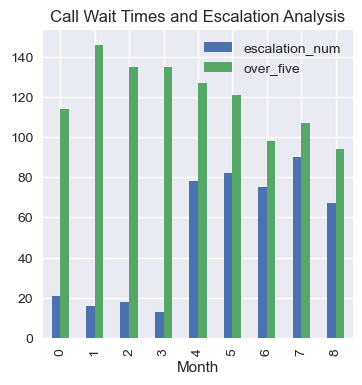

In [213]:
df_merge.plot(kind='bar', title='Call Wait Times and Escalation Analysis')

plt.xlabel('Month')


C:\Users\karis\AppData\Local\Temp\ipykernel_8416\1414852539.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


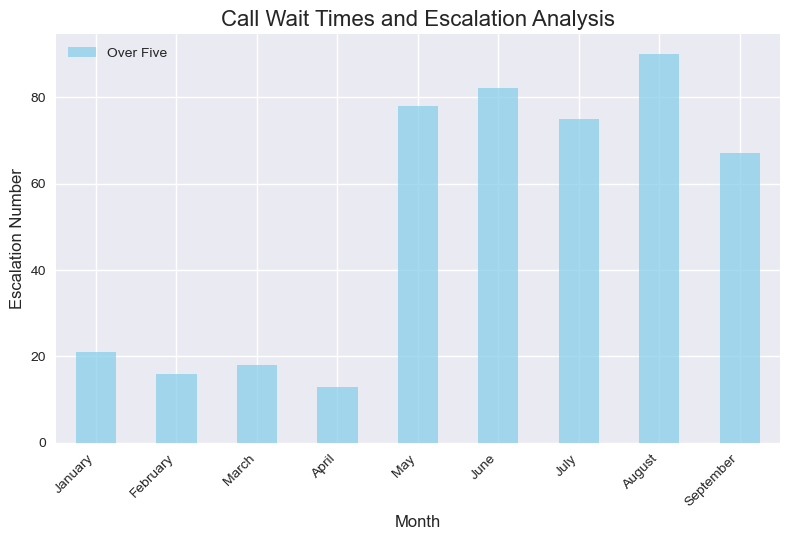

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn')

# Create the bar plot
df_merge.plot(kind='bar', x='month', y='escalation_num', color='skyblue', alpha=0.75, legend=False)

# Set the title and labels
plt.title('Call Wait Times and Escalation Analysis', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Escalation Number', fontsize=12)

# Customize the ticks and tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show a legend with a custom label
plt.legend(['Over Five'], fontsize=10)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\karis\AppData\Local\Temp\ipykernel_8416\1743522942.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


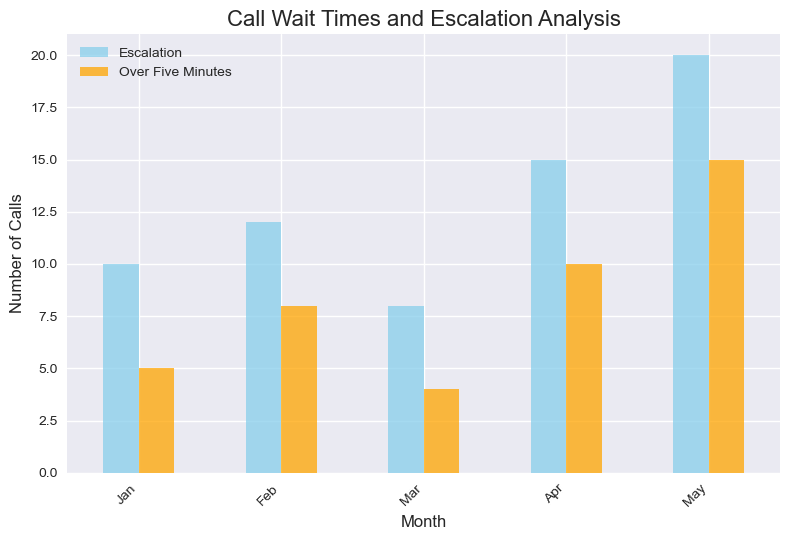

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn')

# Create a DataFrame for demonstration purposes
data = {
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'escalation_num': [10, 12, 8, 15, 20],
    'over_five_num': [5, 8, 4, 10, 15]
}

df_merge = pd.DataFrame(data)

# Create the bar plot
ax = df_merge.plot(kind='bar', x='month', y=['escalation_num', 'over_five_num'], color=['skyblue', 'orange'], alpha=0.75)

# Set the title and labels
plt.title('Call Wait Times and Escalation Analysis', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)

# Customize the ticks and tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show a legend with custom labels
plt.legend(['Escalation', 'Over Five Minutes'], fontsize=10)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


In [240]:
df_cleaned = df1
print(df_cleaned.columns)

Index(['Unnamed: 0', 'date', 'time', 'call_id', 'agent_id',
       'answer_time_minute', 'answer_time_second', 'talk_time_minute',
       'talk_time_second', 'escalation', 'abandoned_num', 'abandoned', 'csat',
       'csat_value', 'over_five', 'day_name', 'month', 'escalation_num'],
      dtype='object')


C:\Users\karis\AppData\Local\Temp\ipykernel_8416\112552254.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


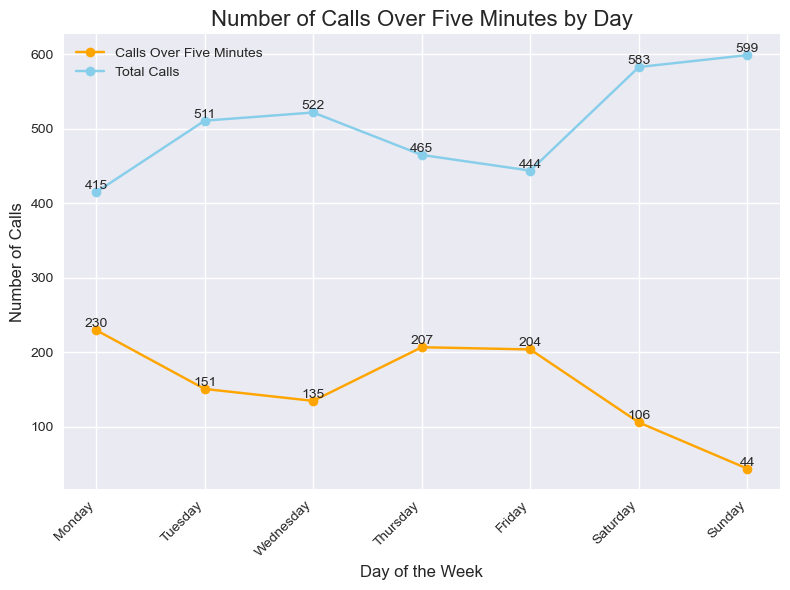

In [245]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn')

# Set the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cleaned['day_name'] = pd.Categorical(df_cleaned['day_name'], categories=day_order, ordered=True)

# Calculate the total number of calls
total_calls = len(df_cleaned)

# Calculate the number of calls over five minutes for each day of the week
calls_over_five = df_cleaned[df_cleaned['over_five'] == 1]['day_name'].value_counts().sort_index()

# Calculate the number of calls for each day of the week
calls_under_five = df_cleaned[df_cleaned['over_five'] == 0]['day_name'].value_counts().sort_index()

# Create the line chart
plt.figure(figsize=(8, 6))
plt.plot(calls_over_five.index, calls_over_five, marker='o', color='orange', label='Calls Over Five Minutes')
plt.plot(calls_under_five.index, calls_under_five, marker='o', color='skyblue', label='Total Calls')

# Add data labels to each point on the 'Calls Over Five Minutes' line
for x, y in zip(calls_over_five.index, calls_over_five):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10)

# Add data labels to each point on the 'Total Calls' line
for x, y in zip(calls_under_five.index, calls_under_five):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10)

# Set the title and labels
plt.title('Number of Calls Over Five Minutes by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)

# Customize the ticks and tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show a legend with custom labels
plt.legend(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [246]:

# Set the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cleaned['day_name'] = pd.Categorical(df_cleaned['day_name'], categories=day_order, ordered=True)

# Calculate the total number of calls
total_calls = len(df_cleaned)

# Calculate the number of calls over five minutes for each day of the week
calls_over_five = df_cleaned[df_cleaned['over_five'] == 1]['day_name'].value_counts().sort_index()

# Calculate the percentage of calls over five minutes for each day of the week
percentage_over_five = (calls_over_five / total_calls) * 100

# Print the percentage for each day of the week
for day, percentage in percentage_over_five.items():
    print(f"{day}: {percentage:.2f}%")


Monday: 4.98%
Tuesday: 3.27%
Wednesday: 2.92%
Thursday: 4.48%
Friday: 4.42%
Saturday: 2.30%
Sunday: 0.95%


In [247]:
import pandas as pd

# Set the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cleaned['day_name'] = pd.Categorical(df_cleaned['day_name'], categories=day_order, ordered=True)

# Calculate the number of calls for each day of the week
calls_per_day = df_cleaned['day_name'].value_counts()

# Find the day of the week with the highest call volume
day_with_highest_volume = calls_per_day.idxmax()

# Print the result
print("Day of the week with the highest call volume:", day_with_highest_volume)


Day of the week with the highest call volume: Saturday


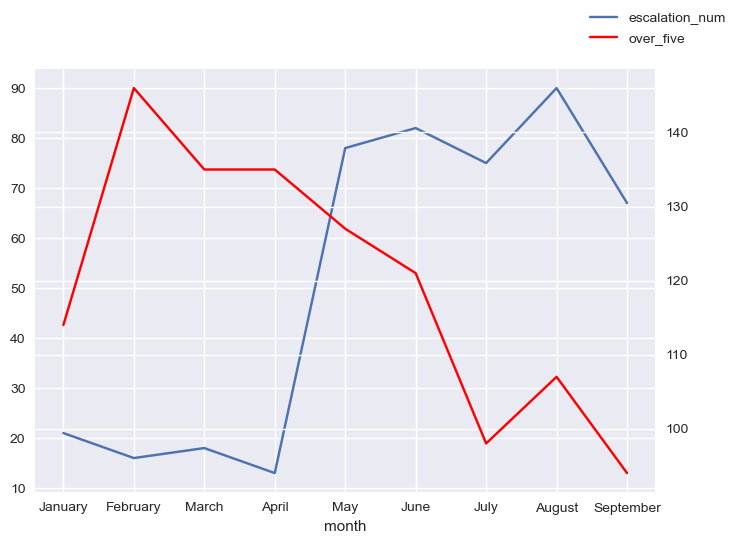

In [14]:
import seaborn as sns

ax = df_merge.plot(x="month", y="escalation_num", legend=False)
ax2 = ax.twinx()
df_merge.plot(x="month", y="over_five", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()


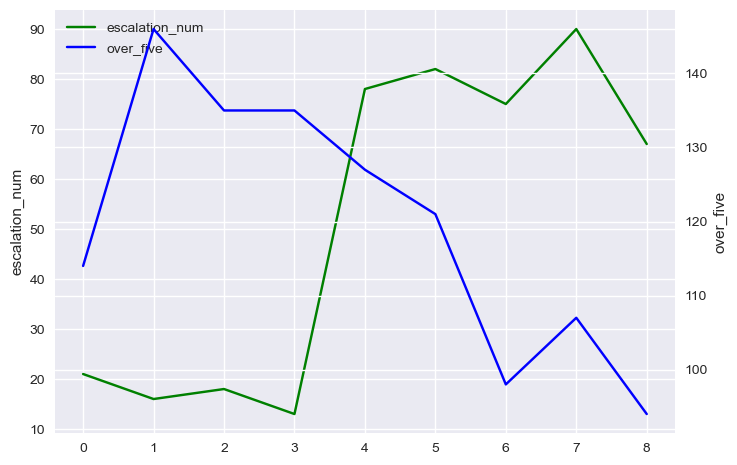

In [15]:
from matplotlib.lines import Line2D
    
g = sns.lineplot(data=df_merge.escalation_num, color="g")
sns.lineplot(data=df_merge.over_five, color="b", ax=g.axes.twinx())
g.legend(handles=[Line2D([], [], marker='_', color="g", label='escalation_num'), Line2D([], [], marker='_', color="b", label='over_five')])

<Axes: title={'center': 'Call Wait Times and Escalation Analysis'}, xlabel='month'>

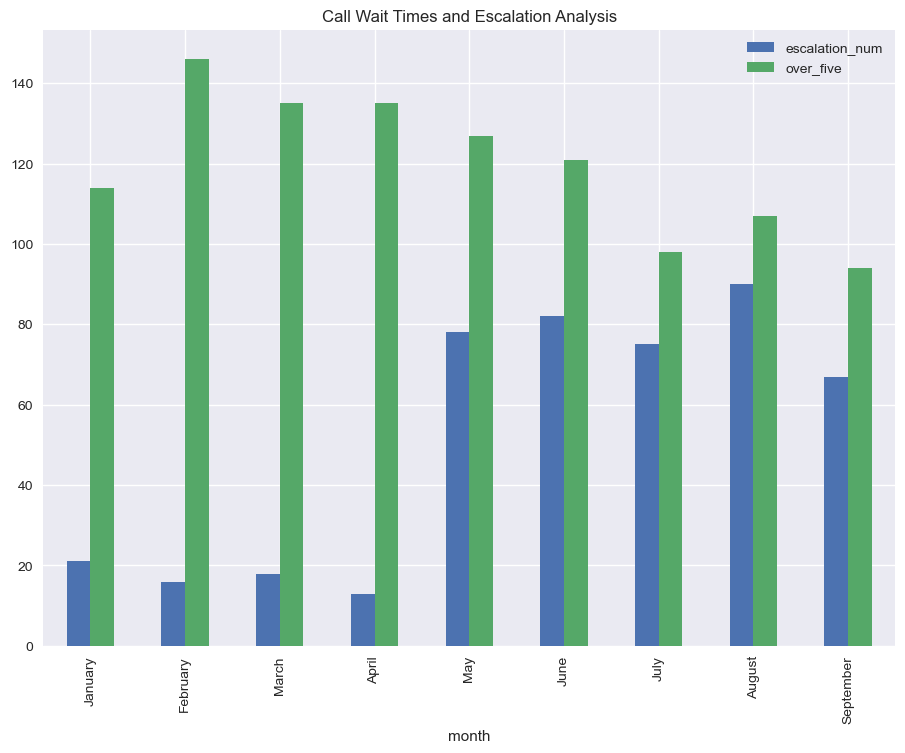

In [16]:
df_merge.plot(x='month', y=['escalation_num', 'over_five'], figsize=(11,8), grid=True, kind='bar', title='Call Wait Times and Escalation Analysis')


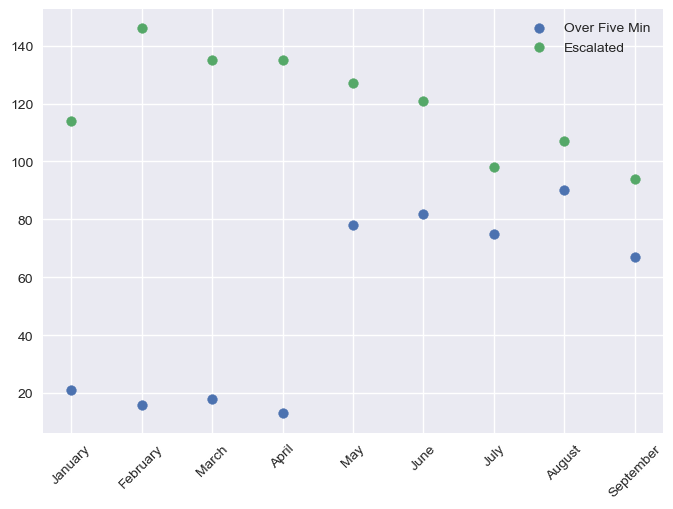

In [17]:
plt.xticks(rotation=45)
x1 = df_merge['month']
y1 = df_merge['over_five']
y2 = df_merge['escalation_num']

plt.scatter(x=x1, y=y2)
plt.scatter(x=x1, y=y1)
classes = ['Over Five Min', 'Escalated']
plt.legend(labels=classes)
plt.show()


In [18]:
#New dataframes with the day of the week and number of escalations, and over five columns
#ref: https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/?expand_article=1

dfee=df2.copy()
dfee.drop(dfee[dfee.escalation_num == 0].index, inplace=True)
dfee = df2.filter(['escalation_num', 'day_name'], axis=1)

dfww = df2.copy()
dfww.drop(dfww[dfww.over_five == 0].index, inplace=True)
dfww = dfww.filter(['over_five', 'day_name'], axis=1)



#now going to group then merge the dataframes into one
#first sorting
dfee = dfee.groupby('day_name', as_index=False).sum()
dfee = sort_dataframeby_monthorweek.Sort_Dataframeby_Weekday(df=dfee, Weekdaycolumnname='day_name')


dfww = dfww.groupby('day_name', as_index=False).sum()
dfww = sort_dataframeby_monthorweek.Sort_Dataframeby_Weekday(df=dfww, Weekdaycolumnname='day_name')

df2_merge = pd.merge(dfee, dfww)
df2_merge.head()

df2_merge




,day_name,escalation_num,over_five
0,Monday,111,230
1,Tuesday,81,151
2,Wednesday,85,135
3,Thursday,103,207
4,Friday,77,204
5,Saturday,0,106
6,Sunday,3,44


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

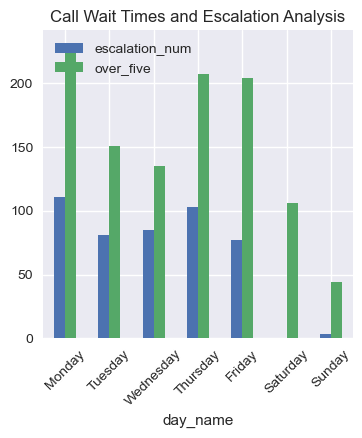

In [19]:

plt.rcParams['figure.figsize'] = [4, 4]
df2_merge.plot(x="day_name", kind='bar', title='Call Wait Times and Escalation Analysis')

ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.xticks(rotation=45)

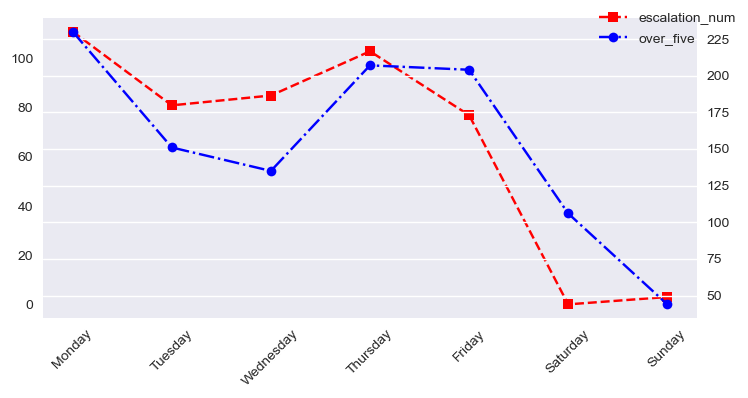

In [28]:
plt.rcParams["figure.figsize"] = [7.50, 4]
plt.rcParams["figure.autolayout"] = True

ax = df2_merge.plot(x="day_name", y="escalation_num", linestyle='--', marker='s', legend=False, color='r')
ax2 = ax.twinx()
df2_merge.plot(x="day_name", y="over_five", linestyle='-.', marker='o', ax=ax2, legend=False, color="b")
ax.figure.legend()
ax.grid(False)
ax.set(xlabel=None)
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

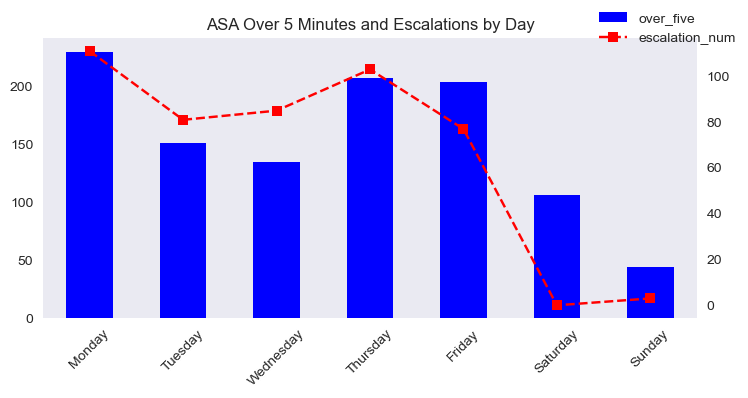

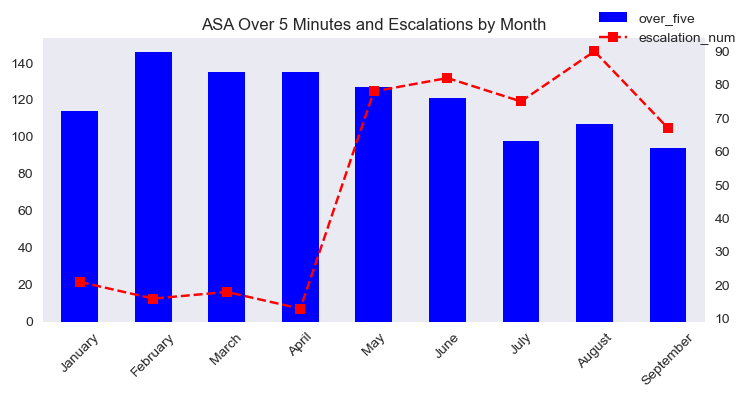

In [29]:
#day with most escalations, call waits > 5

ax = df2_merge.plot(x="day_name", y="over_five", kind='bar', color='b', legend=False)
ax2 = ax.twinx()
df2_merge.plot(x="day_name", y="escalation_num", ax=ax2, linestyle='--', marker='s', color="r", title="ASA Over 5 Minutes and Escalations by Day", legend=False)
ax.grid(False)
ax2.grid(False)
ax.figure.legend()
ax.set(xlabel=None)
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

#Month with most escalations,  call waits > 5

ax = df_merge.plot(x="month", y="over_five", kind='bar', color='b', legend=False)
ax2 = ax.twinx()
df_merge.plot(x="month", y="escalation_num", ax=ax2, linestyle='--', marker='s', color="r", title="ASA Over 5 Minutes and Escalations by Month", legend=False)
ax.grid(False)
ax2.grid(False)
ax.figure.legend()
ax.set(xlabel=None)
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

In [30]:
#calculating correlation using .corr() for the entire dataset
corr = df1['escalation_num'].corr(df1['over_five'])
print("Correlation between Escalations and ASA greater than 5 minutes is: ", round(corr, 2))

Correlation between Escalations and ASA greater than 5 minutes is:  0.09


#### Moving into another direction. When call volume is higher, is wait time longer, and if so on what day of the week?

In [31]:
#creating a new copy with all of the columns to work with 
#sum of the number of calls in the dataset

df_vol = df1.copy()
calls = df_vol.call_id.count()

overs = df_vol.over_five.sum()

print('Calls: '+str(calls)+'\t'+'Over five minutes: '+str(overs))

Calls: 4616	Over five minutes: 1077


In [32]:
#create dataframe with calls, day of the week
df_vol2 = df_vol.filter(['call_id', 'day_name'], axis=1)
df_vol2 = df_vol2.groupby('day_name', as_index=False).count()
df_vol2 = sort_dataframeby_monthorweek.Sort_Dataframeby_Weekday(df=df_vol2, Weekdaycolumnname='day_name')

df_vol2

,day_name,call_id
0,Monday,645
1,Tuesday,662
2,Wednesday,657
3,Thursday,672
4,Friday,648
5,Saturday,689
6,Sunday,643


In [33]:
#create dataframe with number of escalations and over five by day of the week
df_vol3 = df_vol.filter(['day_name', 'over_five', 'escalation_num'], axis=1) 

df_vol3 = df_vol3.groupby('day_name', as_index=False).sum()
df_vol3 = sort_dataframeby_monthorweek.Sort_Dataframeby_Weekday(df=df_vol3, Weekdaycolumnname='day_name')

df_vol3

,day_name,over_five,escalation_num
0,Monday,230,111
1,Tuesday,151,81
2,Wednesday,135,85
3,Thursday,207,103
4,Friday,204,77
5,Saturday,106,0
6,Sunday,44,3


In [34]:
#merge the dataframes
df_merge_vol = pd.merge(df_vol2,df_vol3)
df_merge_vol

,day_name,call_id,over_five,escalation_num
0,Monday,645,230,111
1,Tuesday,662,151,81
2,Wednesday,657,135,85
3,Thursday,672,207,103
4,Friday,648,204,77
5,Saturday,689,106,0
6,Sunday,643,44,3


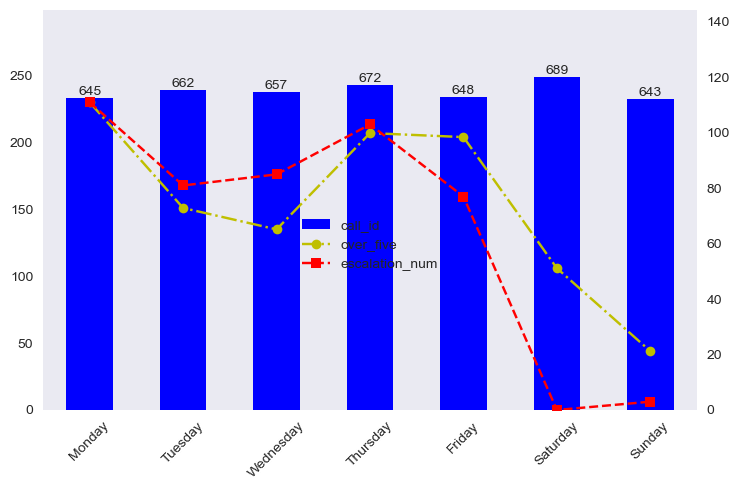

In [35]:
plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = False

ycall = df_merge_vol['call_id'].max()
yover = df_merge_vol['over_five'].max()
yesc = df_merge_vol['escalation_num'].max()

#df[col_name].value_counts().nlargest(n=1)

ax = df_merge_vol.plot.bar(x="day_name", y="call_id", legend=False, color="b")
ax2 = ax.twinx()
df_merge_vol.plot(x="day_name", y="over_five", linestyle='-.', marker='o', ax=ax2, legend=False, color="y")
ax3 = ax.twinx()
df_merge_vol.plot(x="day_name", y="escalation_num", linestyle='--', marker='s', ax=ax3, legend=False, color='r')

ax.figure.legend(loc=10)
ax.grid(False)
ax2.grid(False)
ax3.grid(False)

ax.set(yticklabels=[])
#ax2.set(yticklabels=[])
ax2.yaxis.tick_left()


ax.tick_params(left=False)
ax2.tick_params(right=False)
ax3.tick_params(right=False)

ax.bar_label(ax.containers[0], label_type='edge')

ax.set_ylim(0, ycall*1.2)
ax2.set_ylim(0, yover*1.3)
ax3.set_ylim(0, yesc*1.3)

ax.set(xlabel=None)

ax.tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.show()

In [36]:
plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = False

ycall = df_merge_vol['call_id'].max()
yover = df_merge_vol['over_five'].max()
yesc = df_merge_vol['escalation_num'].max()

#df[col_name].value_counts().nlargest(n=1)

X = df_merge_vol.loc[:, 'call_id'].values.reshape(-1, 1) # values converts it into a numpy array
Y = df_merge_vol.loc[:, 'over_five'].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column




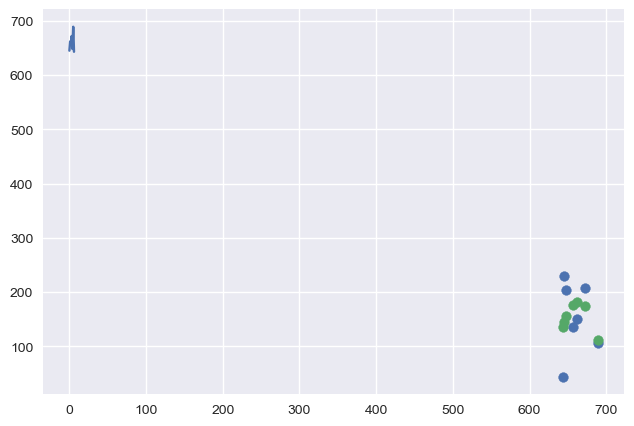

In [37]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, Y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

plt.scatter(X, Y)
plt.scatter(X, lin_reg.predict(pr.fit_transform(X)))
plt.plot(X, )

plt.show() 
    

### Regression Analysis

In [39]:
#first create a copy of the df1 before performing the regression
#starting with df1 
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

df_r=df_r.groupby('day_name', as_index=False).sum()
plt.grid(color='white', lw = 0.5, axis='x')

model = LinearRegression()

# histogram of the calls
df_r.call_id.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7), bins=10)
plt.title('Distribution of Call Volume', size=24)
plt.xlabel('Calls)', size=18)
plt.ylabel('Volume', size=18)


plt.show()

NameError: name 'df_r' is not defined

NameError: name 'df_r' is not defined

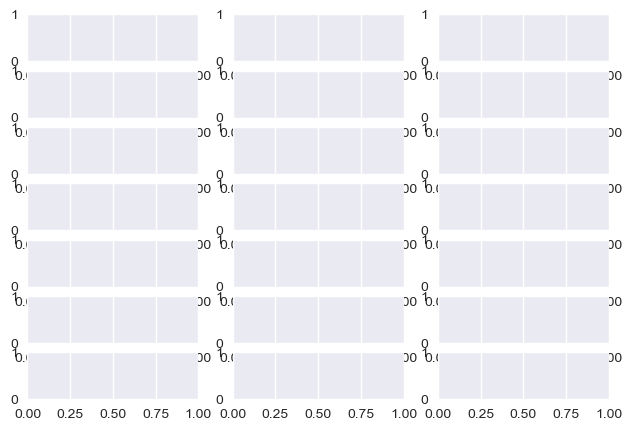

In [40]:
#make this example reproducible
np.random.seed(1)

#define number of subplots
fig, axis = plt.subplots(7, 3)


df_r.hist(ax=axis)